In [1]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import json
import seaborn as sns

In [2]:
ca_df = pd.read_csv('../resources/CAvideos.csv', encoding='utf-8')
ca_df=ca_df.dropna(how='any')
ca_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10.0,11/10/2017 12:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,11/13/2017 12:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,11/12/2017 14:05,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24.0,11/12/2017 13:01,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828.0,132239.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,11/9/2017 6:04,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622.0,1634130.0,21082.0,85067.0,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45796,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24.0,6/13/2018 14:00,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685.0,1701.0,99.0,1312.0,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
45797,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24.0,6/13/2018 15:01,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339.0,460.0,66.0,51.0,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...
45798,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20.0,6/11/2018 13:30,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347.0,25900.0,224.0,3881.0,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
45799,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25.0,6/13/2018 0:00,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225.0,2115.0,182.0,1672.0,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...


In [4]:
de_df = pd.read_csv('../resources/DEvideos.csv', encoding='utf-8')
de_df=de_df.dropna(how='any')
de_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40835,fn5WNxy-Wcw,18.14.06,KINGDOM HEARTS III – E3 2018 Pirates of the Ca...,Kingdom Hearts,20,2018-06-12T01:54:02.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Pirat...",1394530,46778,501,9878,https://i.ytimg.com/vi/fn5WNxy-Wcw/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40836,zAFv43lxqHE,18.14.06,YMS: The Visit,YourMovieSucksDOTorg,24,2018-06-13T21:58:43.000Z,[none],139733,11155,119,1968,https://i.ytimg.com/vi/zAFv43lxqHE/default.jpg,False,False,False,Patreon: http://www.patreon.com/YMSTwitch: htt...
40837,zSXG5I6Y2fA,18.14.06,Ungut umgeschult – Grünwald als Ersthelfer am ...,Grünwald Freitagscomedy,24,2018-06-12T10:01:28.000Z,"Günter Grünwald|""Grünwald Freitagscomedy""|""Gün...",26054,364,11,8,https://i.ytimg.com/vi/zSXG5I6Y2fA/default.jpg,False,False,False,Günter versucht sich als Ersthelfer bei einem ...
40838,5d115sePmaU,18.14.06,Assassin's Creed Odyssey: E3 2018 Welt-Enthüll...,Assassin's Creed DE,20,2018-06-11T21:16:55.000Z,"Assassin's Creed|""Assassins Creed""|""Assassin's...",1139198,14900,1421,1587,https://i.ytimg.com/vi/5d115sePmaU/default.jpg,False,False,False,"Vom verstoßenen Söldner zum legendären Helden,..."


In [5]:
fr_df = pd.read_csv('../resources/FRvideos.csv', encoding='utf-8')
fr_df=fr_df.dropna(how='any')
fr_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o..."
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40718,mSJ_Qb9-WtA,18.14.06,Simon Cowell Falls In LOVE With 'Ms. Trysh' Bu...,Talent Recap,24,2018-06-13T01:36:56.000Z,"America’s got talent|""Americas got talent""|""ag...",560827,8688,147,696,https://i.ytimg.com/vi/mSJ_Qb9-WtA/default.jpg,False,False,False,#Full Segment | America’s Got Talent Season 13...
40719,coVXf3Q9xBk,18.14.06,عاجل و رسمي : الملف الأمريكي يفوز بشرف تنظيم ك...,KORA LOVERS,1,2018-06-13T12:31:04.000Z,"تنظيم كأس العالم 2026|""كأس العالم 2026""|""المغر...",58758,307,86,485,https://i.ytimg.com/vi/coVXf3Q9xBk/default.jpg,False,False,False,المغرب تخسر تنظيم مونديال كاس العالم 2026 لصال...
40720,_umkjOQJvtw,18.14.06,شاهد ملخص البرلمان اليوم بحضور اخنوش الدي يعطي...,Jadal جدل,25,2018-06-12T17:51:24.000Z,"الباكالوريا في المغرب|""صحاب الباك""|""صحاب الباك...",264639,2011,999,1397,https://i.ytimg.com/vi/_umkjOQJvtw/default.jpg,False,False,False,ملخص ابرز ما حصل في جلسة البرلمان يوم 12/06/20...
40721,nt25ec7nzIM,18.14.06,UN ANIME EXPLOSIF A VOIR ABSOLUMENT !,RushManga,22,2018-06-13T11:50:18.000Z,"RushManga|""rush manga""|""anime a voir""|""UN ANIM...",47510,4601,61,615,https://i.ytimg.com/vi/nt25ec7nzIM/default.jpg,False,False,False,•● Yozakura Quartet ~Hana no Uta~ ●•☆ S'abonne...


In [6]:
gb_df = pd.read_csv('../resources/GBvideos.csv', encoding='utf-8')
gb_df=gb_df.dropna(how='any')
gb_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38911,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...
38912,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...
38913,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...
38914,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...


In [7]:
in_df = pd.read_csv('../resources/INvideos.csv', encoding='utf-8')
in_df=in_df.dropna(how='any')
in_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37347,iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,2018-06-13T08:01:11.000Z,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,196,https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg,False,False,False,PRG Music & RDC Rajasthani presents फेकू आशिक़...
37348,dpPmPbhcslM,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,24,2018-06-13T11:30:04.000Z,"flowers serials|""actress""|""malayalam serials""|...",406828,1726,478,1428,https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg,False,False,False,"Flowers - A R Rahman Show,Book your Tickets He..."
37349,mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,2018-06-13T05:00:02.000Z,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697,https://i.ytimg.com/vi/mV6aztP58f8/default.jpg,False,False,False,Subscribe to Mazhavil Manorama now for your da...
37350,qxqDNP1bDEw,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,2018-06-13T15:07:49.000Z,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698,115,65,https://i.ytimg.com/vi/qxqDNP1bDEw/default.jpg,False,False,False,Nuabohu : Story of a rustic village girl who w...


In [8]:
jp_df = pd.read_csv('../resources/JPvideos.csv', engine='python')
jp_df=jp_df.dropna(how='any')
jp_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,5ugKfHgsmYw,18.07.02,é™¸è‡ªãƒ˜ãƒªã€�åž‚ç›´ã�«è�½ä¸‹ï¼�è·¯ä¸Šã�®è»Šã...,æ™‚äº‹é€šä¿¡æ˜ åƒ�ã‚»ãƒ³ã‚¿ãƒ¼,25.0,2/5/2018 22:04,"äº‹æ•…|""ä½�è³€""|""ä½�è³€çœŒ""|""ãƒ˜ãƒªã‚³ãƒ—ã‚¿ãƒ...",188085.0,591.0,189.0,0.0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,True,False,False,ä½�è³€çœŒç¥žåŸ¼å¸‚ã�®æ°‘å®¶ã�«å¢œè�½ã�—ã�Ÿé™¸ä...
3,5wNnwChvmsQ,18.07.02,æ�±äº¬ãƒ‡ã‚£ã‚ºãƒ‹ãƒ¼ãƒªã‚¾ãƒ¼ãƒˆã�®å…ƒã‚­ãƒ£ã...,ã‚¢ã‚·ã‚¿ãƒŽãƒ¯ãƒ€ã‚¤,25.0,2/6/2018 1:08,ã‚¢ã‚·ã‚¿ãƒŽãƒ¯ãƒ€ã‚¤,96255.0,1165.0,277.0,545.0,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,False,False,False,æ�±äº¬ãƒ‡ã‚£ã‚ºãƒ‹ãƒ¼ãƒªã‚¾ãƒ¼ãƒˆã�®å…ƒã‚­ãƒ£ã...
4,B7J47qFvdsk,18.07.02,æ¦®å€‰å¥ˆã€…ã€�è¡�æ’ƒã�®æ­»ã‚“ã� ã�µã‚Šï¼�æ˜ ç...,ã‚·ãƒ�ãƒžãƒˆã‚¥ãƒ‡ã‚¤,1.0,2/5/2018 21:30,[none],108408.0,1336.0,74.0,201.0,https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg,False,False,False,å®¶ã�«å¸°ã�£ã�¦ã��ã�Ÿã‚µãƒ©ãƒªãƒ¼ãƒžãƒ³ã�®ã�˜ã...
5,OIDfjdGERr8,18.07.02,æœ‰è³€ã�•ã�¤ã��ã�•ã‚“ã�®æ­»å› ã‚’å…ƒå¤«ãƒ»å’Œç...,æ¿€ç™½ï¼�ï¼�ã‚¹ãƒ¼ãƒ‘ãƒ¼èŠ¸èƒ½ãƒ�ãƒ£ãƒ³ãƒ�ãƒ«ï...,22.0,2/5/2018 22:27,"æœ‰è³€ã�•ã�¤ã��|""å…«æœ¨äºœå¸Œå­�""|""æ²³é‡Žæ™¯å­...",193593.0,0.0,0.0,53.0,https://i.ytimg.com/vi/OIDfjdGERr8/default.jpg,False,True,False,Twitterå§‹ã‚�ã�¾ã�—ã�Ÿï¼�\n\nç™»éŒ²ã‚ˆã‚�ã�—ã�...
7,MPQaySneSUc,18.07.02,ç›´æ’ƒLIVE ã‚°ãƒƒãƒ‡ã‚£! 2018å¹´2æœˆ6æ—¥ 180206,ãƒ�ã‚¤ã‚­ãƒ³ã‚° 2018,23.0,2/6/2018 2:01,[none],66272.0,51.0,167.0,164.0,https://i.ytimg.com/vi/MPQaySneSUc/default.jpg,False,False,False,ç›´æ’ƒLIVE ã‚°ãƒƒãƒ‡ã‚£! 2018å¹´2æœˆ6æ—¥ 180206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21713,GuWCkLnCMOo,18.14.06,à¸«à¸™à¸¶à¹ˆà¸‡à¸”à¹‰à¸²à¸§à¸Ÿà¹‰à¸²à¹€à¸”à¸µà...,Ch3Thailand,24.0,6/13/2018 13:00,à¸«à¸™à¸¶à¹ˆà¸‡à¸”à¹‰à¸²à¸§à¸Ÿà¹‰à¸²à¹€à¸”à¸µà...,81321.0,321.0,17.0,61.0,https://i.ytimg.com/vi/GuWCkLnCMOo/default.jpg,False,False,False,à¸«à¸¥à¸±à¸‡à¸ˆà¸šà¸¥à¸°à¸„à¸£à¸—à¸²à¸‡à¸«à¸™à...
21714,nOUlB0i2MaA,18.14.06,2018 êµ­ë¯¼ì�˜ ì„ íƒ� - ì„ ê±°ë°©ì†¡ 'ì™•ì�˜ ê...,SBS ë‰´ìŠ¤,25.0,6/13/2018 15:10,"ë‰´ìŠ¤|""NEWS""|""news""|""SBS""|""sbs""|""SBS NEWS""|""S...",433188.0,0.0,0.0,175.0,https://i.ytimg.com/vi/nOUlB0i2MaA/default.jpg,False,True,False,'ì„ ê±°ë°©ì†¡ì�˜ ëª…ê°€' SBSê°€ ì˜¨ë‹¤! SBSê°€...
21715,4cRanIowkTE,18.14.06,å…ƒFBIã‚¨ãƒ¼ã‚¸ã‚§ãƒ³ãƒˆã�Œæ•™ã�ˆã‚‹ã€�200ï¼…ä...,ãƒ–ãƒ©ã‚¤ãƒˆã‚µã‚¤ãƒ‰ | Bright Side Japan,26.0,6/13/2018 10:00,"äººã€…ã‚’é­…äº†ã�™ã‚‹æ–¹æ³•|""é­…åŠ›çš„ã�«ã�ªã‚...",39235.0,1194.0,27.0,46.0,https://i.ytimg.com/vi/4cRanIowkTE/default.jpg,False,False,False,å…ƒFBIã‚¨ãƒ¼ã‚¸ã‚§ãƒ³ãƒˆã€�ã‚¸ãƒ£ãƒƒã‚¯ï½¥ã‚·ã...
21716,oLtWIVBVoS8,18.14.06,æ—¥æœ¬Ã—ãƒ‘ãƒ©ã‚°ã‚¢ã‚¤å¾¹åº•åˆ†æž�&ã‚¹ãƒšã‚¤ã...,Leo the football TV,17.0,6/13/2018 9:56,"Wæ�¯|""ãƒ¯ãƒ¼ãƒ«ãƒ‰ã‚«ãƒƒãƒ—""|""è¹´ç�ƒ""|""æ€�æƒ³å...",49900.0,431.0,66.0,336.0,https://i.ytimg.com/vi/oLtWIVBVoS8/default.jpg,False,False,False,ã€Œï¼’ï¼�ï¼‘ï¼˜ï¼·æ�¯ãƒ­ã‚·ã‚¢å¤§ä¼šæ—¥æœ¬ä»£è...


In [9]:
kr_df = pd.read_csv('../resources/KRvideos.csv', engine='python')
kr_df=kr_df.dropna(how='any')
kr_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,ì¢‹ì•„ by ë¯¼ì„œ_ìœ¤ì¢…ì‹ _ì¢‹ë‹ˆ ë‹µê°€,ë�¼í‘¸ë§ˆì½”ë¦¬ì•„,22.0,11/13/2017 2:07,"ë�¼í‘¸ë§ˆ|""ìœ¤ì¢…ì‹ ""|""ì¢‹ë‹ˆ""|""ì¢‹ì•„""|""ìƒ¬ë ...",156130.0,1422.0,40.0,272.0,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,ìœ¤ì¢…ì‹ 'ì¢‹ë‹ˆ'ì�˜ ë‹µê°€ 'ì¢‹ì•„' ìµœì´ˆ ê...
1,hH7wVE8OlQ0,17.14.11,JSA ê·€ìˆœ ë¶�í•œêµ° ì´�ê²© ë¶€ìƒ�,Edward,25.0,11/13/2017 5:59,"JSA|""ê·€ìˆœ""|""ë¶�í•œêµ°""|""ì´�ê²©""|""ë¶€ìƒ�""|""JS...",76533.0,211.0,28.0,113.0,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[ì±„ë„�Aë‹¨ë�…]åŒ— ë³‘ì‚¬ í˜„ìž¬ 'ì�˜ì‹�ë¶ˆëª…...
2,9V8bnWUmE9U,17.14.11,ë‚˜ëª°ë�¼íŒ¨ë°€ë¦¬ ìš´ë�™í™” ì˜�ìƒ� 2íƒ„ (ë¹¼ë...,ë‚˜ëª°ë�¼íŒ¨ë°€ë¦¬ í•«ì‡¼,22.0,11/11/2017 2:16,"ì•„ë””ë‹¤ìŠ¤|""ë¹¼ë¹¼ë¡œ""|""í•«ì‡¼""|""ë‚˜ëª°ë�¼íŒ...",421409.0,5112.0,166.0,459.0,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,í�¼ê°€ì‹¤ë•Œ ê¼­ ì¶œì²˜ ë¶€íƒ�ë“œë ¤ìš”
3,0_8py-t5R80,17.14.11,"á„‹á…µá„†á…§á†¼á„‡á…¡á†¨ ì¶œêµ­ í˜„ìž¥, ë†“ì¹˜...",ë¯¸ë””ì–´ëª½êµ¬,25.0,11/12/2017 6:19,"ì�´ëª…ë°•|""ì�´ëª…ë°• ì¶œêµ­ê¸ˆì§€""|""ì�´ëª…ë°• ...",222850.0,2093.0,173.0,1219.0,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,ë‹¤ìŠ¤ëŠ” ëˆ„êµ¬ê²�ë‹ˆê¹Œ ë“£ê³ ë‚œ í›„ í‘œì •
4,bk55RbxiQdI,17.14.11,ê¹€ìž¥ê²¸ì�€ ë¬¼ëŸ¬ê°”ë‹¤ MBC ë…¸ì¡° í™˜í˜¸ì™€...,NocutV,25.0,11/13/2017 6:08,"nocutV|""ë…¸ì»·V""|""CBS""|""mbc""|""ê¹€ìž¥ê²¸""|""í•´ì...",84466.0,1094.0,109.0,450.0,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,ê¹€ìž¥ê²¸ MBC ì‚¬ìž¥ì�´ ê²°êµ­ í•´ìž„ë��ë‹¤.\n...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36892,pj6YBBrO1sQ,18.14.06,ìž¥ëª¨ë‹˜ ê°€ê²Œí•œë‹¤ê³ 1ì–µë§Œ ë‹¬ë�¼ëŠ” ì•...,ì�´ìŠˆíŠ¸ëž˜ì»¤,24.0,6/10/2018 19:00,[none],156439.0,383.0,58.0,308.0,https://i.ytimg.com/vi/pj6YBBrO1sQ/default.jpg,False,False,False,- ë‚¨íŽ¸ì�„ ë�ˆì¤„ë¡œë§Œ ë³¸ ì•„ë‚´- ì¢‹ì•„ìš”...
36893,_Ne9ER-jr20,18.14.06,ì—¬ëŸ¬ë¶„~ ë Œì¦ˆê°€ ì�´ë ‡ê²Œ ìœ„í—˜í•©ë‹ˆë‹¤...,ì�´ìŠˆí…”ëŸ¬ issueTeller,24.0,6/12/2018 3:00,[none],130948.0,3121.0,55.0,988.0,https://i.ytimg.com/vi/_Ne9ER-jr20/default.jpg,False,False,False,ì•ˆë…•í•˜ì„¸ìš”~! ì�´ìŠˆí…”ëŸ¬ ìž…ë‹ˆë‹¤~^^í™”...
36894,xuOQq_fzEjk,18.14.06,2018ë…„ 6ì›” 13ì�¼ ì•„ì¹¨ ë‰´ìŠ¤,News Express,25.0,6/12/2018 9:17,"í•œêµ­|""ë¶�í•œ""|""ë¯¸êµ­""|""ì¤‘êµ­""|""ì�¼ë³¸""|""ëŸ...",62555.0,319.0,71.0,105.0,https://i.ytimg.com/vi/xuOQq_fzEjk/default.jpg,False,False,False,2018ë…„ 6ì›” 13ì�¼ ì•„ì¹¨ ë‰´ìŠ¤ë“±ë¡�ë�˜ì§€ ì...
36895,uXvjxeg08eQ,18.14.06,ì›Œë„ˆì›� ì›ƒì�Œ ì°¸ê¸° ì˜�ìƒ� ì›Œë„ˆì›� GO X-...,ì›�í”Œ,22.0,6/11/2018 7:57,"ì›Œë„ˆì›�|""ì›Œë„ˆì›� ê³ ""|""ì›Œë„ˆì›� GO""|""ì›ƒì...",63306.0,2369.0,27.0,571.0,https://i.ytimg.com/vi/uXvjxeg08eQ/default.jpg,False,False,False,ì›Œë„ˆì›� ì›ƒì�Œ ì°¸ê¸° ì˜�ìƒ� í•­ìƒ� ì¢‹ì•„í•...


In [10]:
mx_df = pd.read_csv('../resources/MXvideos.csv', engine='python')
mx_df=mx_df.dropna(how='any')
mx_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24.0,11/13/2017 1:06,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130.0,4182.0,361.0,1836.0,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22.0,11/13/2017 0:11,La Voz Mexico 7,104972.0,271.0,174.0,369.0,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ“ - EL PULSO DE LA REPÃšBLICA,El Pulso De La RepÃºblica,25.0,11/13/2017 12:00,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064.0,10105.0,266.0,607.0,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama â€œEste esp...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25.0,11/12/2017 22:47,"temblor|""costa rica""|""sismo en costa rica""",96153.0,378.0,171.0,208.0,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26.0,11/13/2017 14:17,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965.0,57781.0,681.0,7428.0,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44037,cHlzOeiJJQQ,18.14.06,Ø£Ù‚ÙˆÙ‰ Ù…Ø´Ø§Ù‡Ø¯ Ù‚ÙŠØ§Ø¯Ø© ØªØ­Ø¨Ø³ Ø§Ù„Ø£...,BLA BLA,27.0,5/31/2018 6:00,[none],4829416.0,20084.0,4796.0,1221.0,https://i.ytimg.com/vi/cHlzOeiJJQQ/default.jpg,False,False,False,Ø£Ù‚ÙˆÙ‰ Ù…Ø´Ø§Ù‡Ø¯ Ù‚ÙŠØ§Ø¯Ø© ØªØ­Ø¨Ø³ Ø§Ù„Ø£...
44038,r63VBOagGAo,18.14.06,Shawn Mendes x Portugal (FPF Official World Cu...,FPFutebolOficial,17.0,6/13/2018 9:11,"Canal|""Oficial""|""da""|""FederaÃ§Ã£o""|""Portuguesa...",653114.0,65639.0,547.0,3826.0,https://i.ytimg.com/vi/r63VBOagGAo/default.jpg,False,False,False,Portugal's Football Team Official SongLyrics: ...
44039,i7r_kMbyngk,18.14.06,AMLO llegÃ³ con su esposa al Tercer Debate en ...,AMX,25.0,6/12/2018 21:15,"AMLO|""morena""|""polÃ­tica""|""PRI""|""PAN""|""PRD""|""L...",121674.0,3558.0,58.0,491.0,https://i.ytimg.com/vi/i7r_kMbyngk/default.jpg,False,False,False,AMLO llegÃ³ con su esposa al Tercer Debate en ...
44040,_jnwjdMe3Zo,18.14.06,Maire usa una blusa kawaiii Â¿adorable o ridÃ­...,Historias Wink,24.0,6/13/2018 11:08,"maire|""maire vs el internet""|""maire vs interne...",14067.0,538.0,6.0,90.0,https://i.ytimg.com/vi/_jnwjdMe3Zo/default.jpg,False,False,False,Maire usa una blusa kawaii de Alicia en el paÃ...


In [11]:
us_df = pd.read_csv('../resources/USvideos.csv', encoding='utf-8')
us_df=us_df.dropna(how='any')
us_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40943,1PhPYr_9zRY,18.14.06,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,22,2018-05-18T16:39:29.000Z,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259128,645888,4052,62610,https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg,False,False,False,"BTS with the PPS, the puppies. These adorable ..."
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [12]:
ru_df = pd.read_csv('../resources/RUvideos102.csv', encoding='utf-8')
ru_df=ru_df.dropna(how='any')
ru_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,17.14.11,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,11/13/2017 4:09,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,17.14.11,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,11/13/2017 12:32,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,17.14.11,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,11/13/2017 11:11,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
3,gknkFwKQfHg,17.14.11,Сочная кесадилья с курицей,Hochland,22,11/13/2017 1:51,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
4,3sYvZcwzZr8,17.14.11,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,11/13/2017 11:52,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40734,OMmR9THjVKM,18.14.06,У меня СДВГ! (Story booth на русском) Русская ...,Pastime Time,22,6/13/2018 9:47,"story booth на русском|""story booth перевод""|""...",129488,5893,164,990,https://i.ytimg.com/vi/OMmR9THjVKM/default.jpg,False,False,False,Котики в Blade and Soul - https://bit.ly/2JoOq...
40735,tX7p7NtNVDE,18.14.06,Мои Детские Травмы 2 (анимация),CaGArt,23,6/12/2018 5:38,"кагарт|""каги""|""цагарт""|""гагарт""|""какарт""|""милш...",99163,4659,337,692,https://i.ytimg.com/vi/tX7p7NtNVDE/default.jpg,False,False,False,Мои Детские Травмы 2 (анимация) ▶️Ск...
40736,KAyj5Xm1C64,18.14.06,[ENG SUB] BTS PROM PARTY 2018 Intro + 2nd Gran...,DaisyxBTS 07,24,6/13/2018 8:51,[none],449611,24808,93,974,https://i.ytimg.com/vi/KAyj5Xm1C64/default.jpg,False,False,False,***I do NOT own anything. Just want to share t...
40737,4PiSLIrsSiY,18.14.06,ОБЗОР ВАННОЙ КОМНАТЫ🛁/ТУАЛЕТНОЙ КОМНАТЫ🚽 + ДЕК...,Ксюша Лебедева,22,6/12/2018 20:23,"рум тур ванной комнаты|""room tour bathroom""|""д...",14225,793,39,209,https://i.ytimg.com/vi/4PiSLIrsSiY/default.jpg,False,False,False,"Обзор ванной комнаты, туалетной комнаты+ декор..."


In [13]:
df_list = [us_df, ca_df, de_df, fr_df, gb_df, in_df, jp_df, kr_df, mx_df, ru_df]
df_names_list = ['USA', 'Canada', 'France', 'UK', 'India', 'Japan', 'Korea', 'Mexico', 'Russia']
compound_df = pd.DataFrame(columns=['views', 'likes', 'country'])
df_list.groupby('category_id')


AttributeError: 'list' object has no attribute 'groupby'

In [15]:
#Russia
rufile = open('../resources/RU_category_id.json')
ru_json = json.load(rufile)

In [16]:
length = len(ru_json["items"])
length

ru_df["category_id"] = ru_df["category_id"].astype(str)

for x in range(length):
    id_number = ru_json["items"][x]["id"]
    category_name = ru_json["items"][x]["snippet"]["title"]
    ru_df["category_id"] = ru_df["category_id"].replace({f"{id_number}": f"{category_name}"})
    
ru_df["category_id"] = ru_df["category_id"].replace({"29": "Nonprofits & Activism"})
    
ru_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,17.14.11,Захар и Полина учатся экономить,Т—Ж БОГАЧ,People & Blogs,11/13/2017 4:09,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,17.14.11,Биржа Мемов #29. Большой выпуск,Druzhko Show,People & Blogs,11/13/2017 12:32,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,17.14.11,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,Entertainment,11/13/2017 11:11,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
3,gknkFwKQfHg,17.14.11,Сочная кесадилья с курицей,Hochland,People & Blogs,11/13/2017 1:51,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
4,3sYvZcwzZr8,17.14.11,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,Entertainment,11/13/2017 11:52,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...


In [17]:
ru_count_df = pd.DataFrame(ru_df.groupby("category_id").count(), columns=["video_id"])
ru_count_df = ru_count_df.rename(columns={"video_id": "count"})
ru_count_df.sort_values(by=["count"], ascending=False)

,count
category_id,
People & Blogs,9226
Entertainment,5846
News & Politics,4929
Comedy,2984
Film & Animation,2838
Howto & Style,1964
Sports,1842
Music,1832
Autos & Vehicles,1558


In [19]:
#USA
usfile = open('../resources/US_category_id.json')
us_json = json.load(usfile)

In [20]:
length = len(us_json["items"])
length

us_df["category_id"] = us_df["category_id"].astype(str)

for x in range(length):
    id_number = us_json["items"][x]["id"]
    category_name = us_json["items"][x]["snippet"]["title"]
    us_df["category_id"] = us_df["category_id"].replace({f"{id_number}": f"{category_name}"})
    
us_df["category_id"] = us_df["category_id"].replace({"29": "Nonprofits & Activism"})
    
us_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [21]:
us_count_df = pd.DataFrame(us_df.groupby("category_id").count(), columns=["video_id"])
us_count_df = us_count_df.rename(columns={"video_id": "count"})
us_count_df.sort_values(by=["count"], ascending=False)

,count
category_id,
Entertainment,9819
Music,6437
Howto & Style,4140
Comedy,3435
People & Blogs,3061
News & Politics,2409
Science & Technology,2361
Film & Animation,2340
Sports,2125


In [22]:
#Mexico
mxfile = open('../resources/MX_category_id.json')
mx_json = json.load(mxfile)

In [23]:
length = len(mx_json["items"])
length

mx_df["category_id"] = mx_df["category_id"].astype(str)

for x in range(length):
    id_number = mx_json["items"][x]["id"]
    category_name = mx_json["items"][x]["snippet"]["title"]
    mx_df["category_id"] = mx_df["category_id"].replace({f"{id_number}": f"{category_name}"})
    
mx_df["category_id"] = mx_df["category_id"].replace({"29": "Nonprofits & Activism"})
    
mx_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24.0,11/13/2017 1:06,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130.0,4182.0,361.0,1836.0,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22.0,11/13/2017 0:11,La Voz Mexico 7,104972.0,271.0,174.0,369.0,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ“ - EL PULSO DE LA REPÃšBLICA,El Pulso De La RepÃºblica,25.0,11/13/2017 12:00,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064.0,10105.0,266.0,607.0,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama â€œEste esp...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25.0,11/12/2017 22:47,"temblor|""costa rica""|""sismo en costa rica""",96153.0,378.0,171.0,208.0,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26.0,11/13/2017 14:17,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965.0,57781.0,681.0,7428.0,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...


In [24]:
mx_count_df = pd.DataFrame(mx_df.groupby("category_id").count(), columns=["video_id"])
mx_count_df = mx_count_df.rename(columns={"video_id": "count"})
mx_count_df.sort_values(by=["count"], ascending=False)

,count
category_id,
24.0,12274
22.0,6500
17.0,3673
10.0,3235
25.0,2875
26.0,2410
23.0,1613
1.0,1178
20.0,897


In [25]:
#canada
cafile = open('../resources/CA_category_id.json')
ca_json = json.load(cafile)
length = len(ca_json["items"])
length

ca_df["category_id"] = ca_df["category_id"].astype(str)

for x in range(length):
    id_number = ca_json["items"][x]["id"]
    category_name = ca_json["items"][x]["snippet"]["title"]
    ca_df["category_id"] = ca_df["category_id"].replace({f"{id_number}": f"{category_name}"})
    
ca_df["category_id"] = ca_df["category_id"].replace({"29": "Nonprofits & Activism"})

ca_count_df = pd.DataFrame(ca_df.groupby("category_id").count(), columns=["video_id"])
ca_count_df = ca_count_df.rename(columns={"video_id": "count"})
ca_count_df.sort_values(by=["count"], ascending=False)

,count
category_id,
24.0,13173
25.0,3868
22.0,3726
23.0,3725
10.0,3695
17.0,2650
1.0,2001
26.0,1998
20.0,1330


In [82]:
#denmark
defile = open('../resources/DE_category_id.json')
de_json = json.load(defile)
length = len(de_json["items"])
length

de_df["category_id"] = de_df["category_id"].astype(str)

for x in range(length):
    id_number = de_json["items"][x]["id"]
    category_name = de_json["items"][x]["snippet"]["title"]
    de_df["category_id"] = de_df["category_id"].replace({f"{id_number}": f"{category_name}"})
    
de_df["category_id"] = de_df["category_id"].replace({"29": "Nonprofits & Activism"})

de_count_df = pd.DataFrame(ca_df.groupby("category_id").count(), columns=["video_id"])
de_count_df = de_count_df.rename(columns={"video_id": "count"})
de_count_df.sort_values(by=["count"], ascending=False)

,count
category_id,
Entertainment,13173
News & Politics,3868
People & Blogs,3726
Comedy,3725
Music,3695
Sports,2650
Film & Animation,2001
Howto & Style,1998
Gaming,1330


In [83]:
#France
frfile = open('../resources/FR_category_id.json')
fr_json = json.load(frfile)
length = len(fr_json["items"])
length

fr_df["category_id"] = fr_df["category_id"].astype(str)

for x in range(length):
    id_number = fr_json["items"][x]["id"]
    category_name = fr_json["items"][x]["snippet"]["title"]
    fr_df["category_id"] = fr_df["category_id"].replace({f"{id_number}": f"{category_name}"})
    
fr_df["category_id"] = fr_df["category_id"].replace({"29": "Nonprofits & Activism"})

fr_count_df = pd.DataFrame(fr_df.groupby("category_id").count(), columns=["video_id"])
fr_count_df = fr_count_df.rename(columns={"video_id": "count"})
fr_count_df.sort_values(by=["count"], ascending=False)

,count
category_id,
Entertainment,9510
People & Blogs,4673
Comedy,4223
Sports,4001
Music,3829
News & Politics,3263
Howto & Style,2334
Film & Animation,1884
Gaming,1393


In [84]:
#India
infile = open('../resources/IN_category_id.json')
in_json = json.load(infile)
length = len(in_json["items"])
length

in_df["category_id"] = in_df["category_id"].astype(str)

for x in range(length):
    id_number = in_json["items"][x]["id"]
    category_name = in_json["items"][x]["snippet"]["title"]
    in_df["category_id"] = in_df["category_id"].replace({f"{id_number}": f"{category_name}"})
    
in_df["category_id"] = in_df["category_id"].replace({"29": "Nonprofits & Activism"})

in_count_df = pd.DataFrame(in_df.groupby("category_id").count(), columns=["video_id"])
in_count_df = in_count_df.rename(columns={"video_id": "count"})
in_count_df.sort_values(by=["count"], ascending=False)

,count
category_id,
Entertainment,16462
News & Politics,5173
Music,3857
Comedy,3407
People & Blogs,2494
Film & Animation,1649
Education,1180
Howto & Style,837
Sports,712


In [86]:
jpfile = open('../resources/JP_category_id.json')
jp_json = json.load(jpfile)
length = len(jp_json["items"])
length

jp_df["category_id"] = jp_df["category_id"].astype(str)

for x in range(length):
    id_number = jp_json["items"][x]["id"]
    category_name = jp_json["items"][x]["snippet"]["title"]
    jp_df["category_id"] = jp_df["category_id"].replace({f"{id_number}": f"{category_name}"})
    
jp_df["category_id"] = jp_df["category_id"].replace({"29": "Nonprofits & Activism"})

jp_count_df = pd.DataFrame(jp_df.groupby("category_id").count(), columns=["video_id"])
jp_count_df = jp_count_df.rename(columns={"video_id": "count"})
jp_count_df.sort_values(by=["count"], ascending=False)

,count
category_id,
Entertainment,5867
People & Blogs,2896
Sports,1803
News & Politics,1327
Music,1240
Pets & Animals,1125
Film & Animation,1070
Gaming,917
Howto & Style,787


In [87]:
krfile = open('../resources/KR_category_id.json')
kr_json = json.load(krfile)
length = len(kr_json["items"])
length

kr_df["category_id"] = kr_df["category_id"].astype(str)

for x in range(length):
    id_number = kr_json["items"][x]["id"]
    category_name = kr_json["items"][x]["snippet"]["title"]
    kr_df["category_id"] = kr_df["category_id"].replace({f"{id_number}": f"{category_name}"})
    
kr_df["category_id"] = kr_df["category_id"].replace({"29": "Nonprofits & Activism"})

kr_count_df = pd.DataFrame(kr_df.groupby("category_id").count(), columns=["video_id"])
kr_count_df = kr_count_df.rename(columns={"video_id": "count"})
kr_count_df.sort_values(by=["count"], ascending=False)

,count
category_id,
Entertainment,8526
News & Politics,6668
People & Blogs,5800
Film & Animation,2031
Comedy,1960
Music,1730
Gaming,1356
Sports,868
Pets & Animals,712


In [130]:
gbfile = open('../resources/GB_category_id.json')
gb_json = json.load(gbfile)
length = len(gb_json["items"])
length

gb_df["category_id"] = gb_df["category_id"].astype(str)

for x in range(length):
    id_number = gb_json["items"][x]["id"]
    category_name = gb_json["items"][x]["snippet"]["title"]
    gb_df["category_id"] = gb_df["category_id"].replace({f"{id_number}": f"{category_name}"})
    
gb_df["category_id"] = gb_df["category_id"].replace({"29": "Nonprofits & Activism"})

gb_count_df = pd.DataFrame(gb_df.groupby("category_id").count(), columns=["video_id"])
gb_count_df = gb_count_df.rename(columns={"video_id": "count"})
gb_count_df.sort_values(by=["count"], ascending=False)

,count
category_id,
Music,13658
Entertainment,8980
People & Blogs,2818
Film & Animation,2555
Howto & Style,1921
Sports,1886
Comedy,1802
Gaming,1761
News & Politics,1164


In [98]:
ww_cat = gb_count_df.add(kr_count_df, fill_value=0).add(jp_count_df, fill_value=0).add(us_count_df, fill_value=0).add(ru_count_df, fill_value=0).add(mx_count_df, fill_value=0).add(in_count_df, fill_value=0).add(gb_count_df, fill_value=0).add(fr_count_df, fill_value=0).add(de_count_df, fill_value=0).add(ca_count_df, fill_value=0)
ww_cat_sorted = ww_cat.sort_values(by=["count"], ascending=False)
ww_cat_sorted

,count
category_id,
Entertainment,112610.0
Music,56866.0
People & Blogs,47738.0
News & Politics,36708.0
Comedy,29362.0
Sports,24096.0
Film & Animation,22102.0
Howto & Style,20855.0
Gaming,12639.0


(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 <a list of 7 Text major ticklabel objects>)

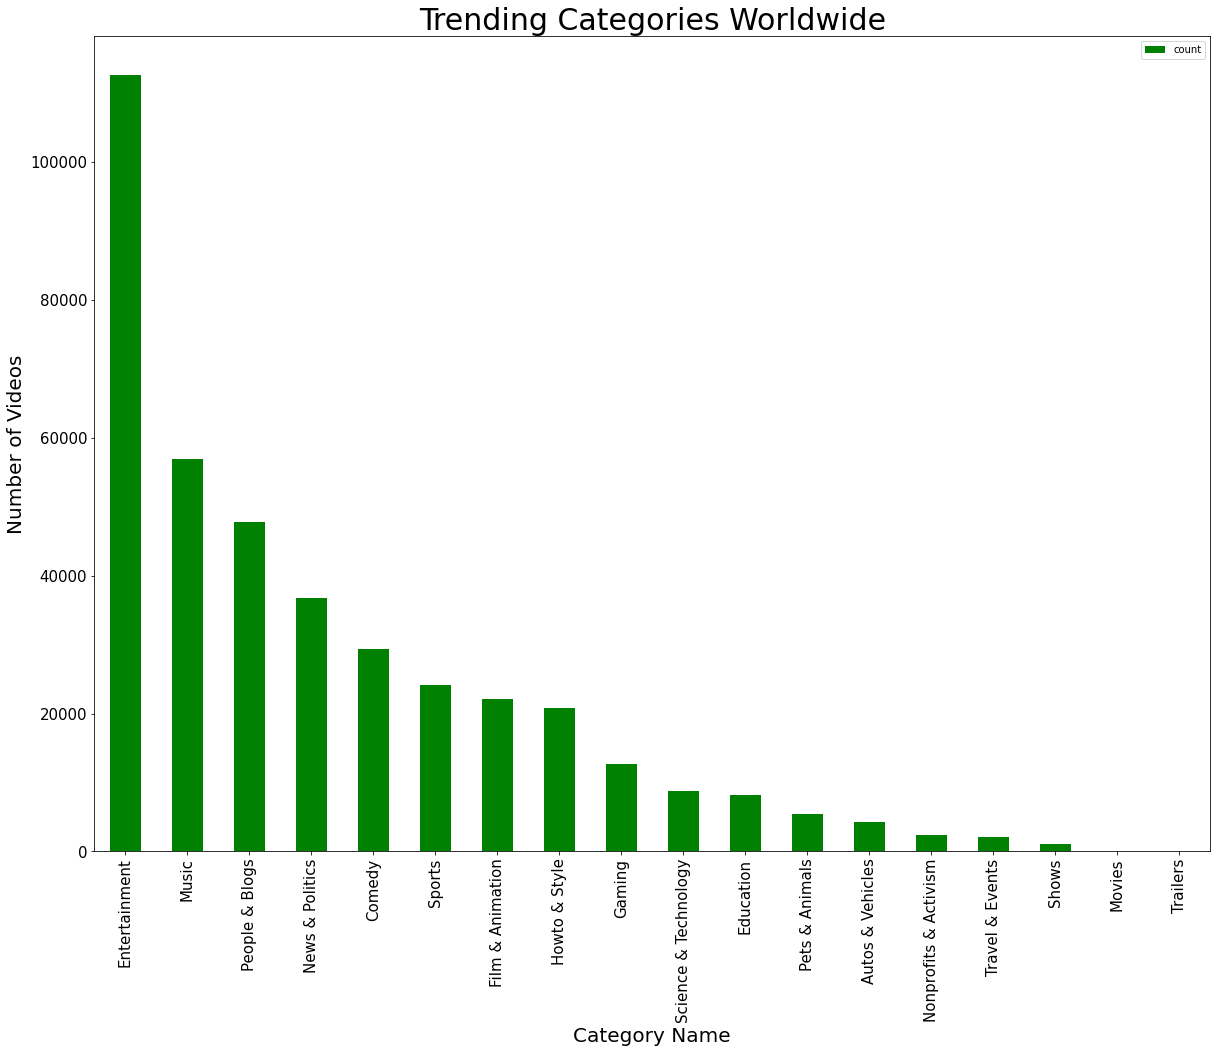

In [111]:
ww_cat_sorted.plot(kind='bar', figsize=(20,15), color='green')
plt.title("Trending Categories Worldwide", size=30)
plt.xlabel('Category Name', size=20)
plt.ylabel('Number of Videos', size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [193]:
xxx_df = pd.concat({
    'KR': kr_count_df, 
    'GB': gb_count_df,
    'CA':ca_count_df,
    'DE':de_count_df,
    'FR':fr_count_df,
    'IN':in_count_df,
    'JP':jp_count_df,
    'RU':ru_count_df,
    'US':us_count_df,
    'MX': mx_count_df,}, axis=1)
xxx_df.fillna(0)


,KR,GB,CA,DE,FR,IN,JP,RU,US,MX
,count,count,count,count,count,count,count,count,count,count
Autos & Vehicles,112.0,144.0,348.0,348.0,610,69.0,269.0,1558.0,379.0,246.0
Comedy,1960.0,1802.0,3725.0,3725.0,4223,3407.0,686.0,2984.0,3435.0,1613.0
Education,455.0,457.0,982.0,982.0,740,1180.0,106.0,663.0,1642.0,489.0
Entertainment,8526.0,8980.0,13173.0,13173.0,9510,16462.0,5867.0,5846.0,9819.0,12274.0
Film & Animation,2031.0,2555.0,2001.0,2001.0,1884,1649.0,1070.0,2838.0,2340.0,1178.0
Gaming,1356.0,1761.0,1330.0,1330.0,1393,66.0,917.0,1025.0,803.0,897.0
Howto & Style,545.0,1921.0,1998.0,1998.0,2334,837.0,787.0,1964.0,4140.0,2410.0
Music,1730.0,13658.0,3695.0,3695.0,3829,3857.0,1240.0,1832.0,6437.0,3235.0
News & Politics,6668.0,1164.0,3868.0,3868.0,3263,5173.0,1327.0,4929.0,2409.0,2875.0


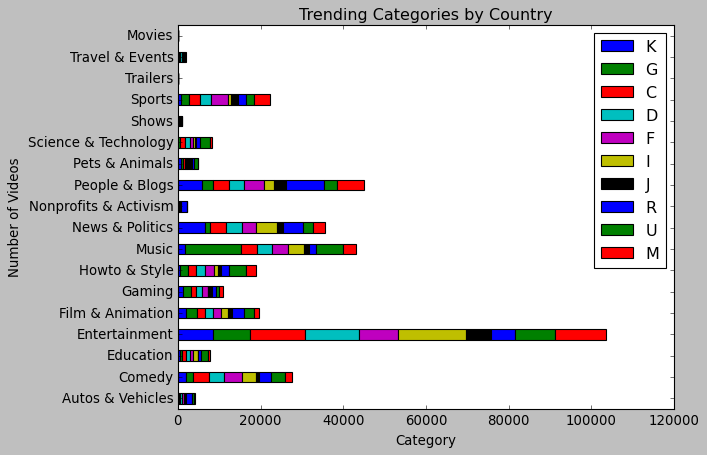

In [203]:
big_plot = xxx_df.plot(kind='barh', stacked = True)
plt.style.use('classic')
plt.xlabel('Category', size=12)
plt.ylabel('Number of Videos', size=12)
plt.title('Trending Categories by Country')
plt.legend("KGCDFIJRUM")